# iForest

In [1]:
import warnings
warnings.filterwarnings('ignore')

## General libraries

In [2]:
import os
import sys

import pandas as pd
import numpy as np

from os.path import join
import json
import datetime

import shap
from shap_selection import feature_selection

from sklearn.preprocessing import OneHotEncoder
import time

### Load enviroment variables

In [3]:
from dotenv import load_dotenv
load_dotenv('../.env')

code_root = os.environ['CODE_ROOT']
cfg_path = os.environ['CFG_PATH']
data_root = os.environ['DATA_ROOT']

sys.path.insert(0, code_root)

### Specific libraries

In [4]:
from src.load.functions import get_fs_dataset, fs_datasets_hyperparams
from src.model.functions import train_and_evaluate_iforest

## General parameters

In [5]:
n_iter_fs = 1
n_iter = 1
contamination_percentage = [1]
trees = [1, 5, 25, 50, 75, 100, 125, 150, 175, 200]

## Allianz

----
**Dataset source**: Private dataset from Allianz Benelux, which contain the claims data from clients during 201801-202312

**Additional sources**:

----

In [6]:
dataset_id = 'allianz'

data = get_fs_dataset(dataset_id, data_root)
hyper = fs_datasets_hyperparams(dataset_id)
data.shape

(42358, 36)

In [7]:
hyper['contamination'] = 0.1
hyper

{'contamination': 0.1, 'max_samples': 256, 'n_estimators': 100}

In [8]:
excluded_cols = []

### iForest

## Parameters

In [9]:
path_fi_shap = os.path.join(data_root, "outputs", f"{dataset_id}_fi_shap.parquet")
path_shap = os.path.join(data_root, "outputs", f"{dataset_id}_shap.parquet")

fi_shap_all = pd.read_parquet(path_fi_shap)

## Model training with iterations HPO and FS

In [10]:
# Capture the start time
start_time = datetime.datetime.now()

df = train_and_evaluate_iforest(data, dataset_id=dataset_id, hyper=hyper, fi_df=fi_shap_all, n_tree_estimators=trees, contamination_percentage=contamination_percentage, excluded_cols=excluded_cols, n_iter_fs=n_iter_fs, n_iter=n_iter)

# Capture the finish time
finish_time = datetime.datetime.now()

# Calculate the duration
duration = finish_time - start_time

print(f"Duration: {duration}")

Iteration by tree number: 1
  Iteration by contamination: 0.1
    Number of featured: 2
     Iteration by feat number: 2
    Number of featured: 3
     Iteration by feat number: 2
     Iteration by feat number: 3
    Number of featured: 5
     Iteration by feat number: 2
     Iteration by feat number: 3
     Iteration by feat number: 4
     Iteration by feat number: 5
    Number of featured: 7
     Iteration by feat number: 2
     Iteration by feat number: 4
     Iteration by feat number: 5
     Iteration by feat number: 7
    Number of featured: 9
     Iteration by feat number: 2
     Iteration by feat number: 3
     Iteration by feat number: 5
     Iteration by feat number: 7
     Iteration by feat number: 9
    Number of featured: 12
     Iteration by feat number: 2
     Iteration by feat number: 4
     Iteration by feat number: 7
     Iteration by feat number: 9
     Iteration by feat number: 12
    Number of featured: 15
     Iteration by feat number: 3
     Iteration by feat numb

In [11]:
df_save = df.copy()

In [12]:
df_save

,f1-score,recall,precision,roc_auc,stab_model,stab_model_list,stab_shap,stab_shap_list,n_estimators,max_feats,contamination,n_feats,n_iter,n_iter_fs
0,0.069892,0.037559,0.502355,0.499636,0.995422,"[[0.9999999783787754, 0.9999996642469549, 0.99...","[1.0, 0.6993453543800288, 0.6993453543800288, ...","[[1.0, 1.0], [0.6993453543800288, 0.6993453543...",1,2,0.1,2,1,1
1,0.094336,0.051995,0.508028,0.502585,0.999435,"[[1.0, 0.999999984930444, 0.9999999999130227, ...","[0.8813690597113473, 0.8813690597113473, 1.0, ...","[[1.0, 0.8220535895670209, 0.8220535895670209]...",1,2,0.1,3,1,1
2,0.094336,0.051995,0.508028,0.502585,0.964343,"[[0.9999999759474377, 0.9979805593182888, 0.99...","[1.0, 0.51514826031388, 1.0, 0.51514826031388,...","[[1.0, 1.0, 1.0], [0.5029685762319, 0.54463179...",1,3,0.1,3,1,1
3,0.160071,0.095188,0.502790,0.498025,1.000000,"[[1.0, 1.0, 0.9999999999999297, 0.999999999999...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1....",1,2,0.1,5,1,1
4,0.160071,0.095188,0.502790,0.498025,0.964372,"[[0.9999920884575222, 0.999999717896912, 0.999...","[0.9716341141784128, 0.9716341141784128, 0.957...","[[1.0, 0.9290852854460322, 0.9290852854460322,...",1,3,0.1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.167025,0.100352,0.497672,0.493312,0.995861,"[[0.999999973680966, 0.9795437094301453, 0.984...","[0.9745108760797612, 0.9632761386950895, 0.967...","[[1.0, 0.9961326032179281, 0.9879495363125556,...",200,7,0.1,36,1,1
456,0.169594,0.101995,0.502894,0.494303,0.994831,"[[0.9999999999985161, 0.9795846768595622, 0.96...","[0.9719719134740982, 0.9651370187816415, 0.948...","[[1.0, 0.9890418733804331, 0.9858713164742453,...",200,14,0.1,36,1,1
457,0.169951,0.102230,0.503468,0.493629,0.993198,"[[0.9999999995635018, 0.9803158871840952, 0.99...","[0.976681523032808, 0.9485755570570157, 0.9490...","[[1.0, 0.9592525855669236, 0.9617258992776404,...",200,21,0.1,36,1,1
458,0.168799,0.101408,0.503203,0.493796,0.994377,"[[0.9999999999904314, 0.9742798108933134, 0.97...","[0.9750556463104201, 0.9512043202091949, 0.940...","[[0.9999225487662545, 0.9867536222287782, 0.98...",200,28,0.1,36,1,1


In [13]:
df = df.drop(columns=['stab_shap_list', 'stab_model_list'])

In [14]:
df.to_parquet(path_shap)

In [15]:
def process_data(df):
    """
    Processes SHAP data files by reading them, filtering, and calculating additional metrics.
    
    Parameters:
    - dataset_id: The unique identifier for the dataset.
    - data_root: The root directory where the data files are located.
    
    Returns:
    - df: The processed pandas DataFrame containing selected variables and calculated metrics.
    """
    # Calculate percentiles and stability index
    df['shap_q1'] = df['stab_shap'].apply(lambda x: np.percentile(x, 75))
    df['shap_q2'] = df['stab_shap'].apply(lambda x: np.percentile(x, 50))
    df['shap_q3'] = df['stab_shap'].apply(lambda x: np.percentile(x, 25))
    df['stability index'] = df['stab_shap'].apply(lambda x: np.mean(x))

    return df

In [16]:
test = process_data(df)
test = test[(test.n_estimators==100) & (test.n_feats==test.n_feats.max()) & (test.max_feats==test.max_feats.max())]
test

,f1-score,recall,precision,roc_auc,stab_model,stab_shap,n_estimators,max_feats,contamination,n_feats,n_iter,n_iter_fs,shap_q1,shap_q2,shap_q3,stability index
275,0.168606,0.101174,0.505572,0.492679,0.987349,"[0.9501613752421596, 0.9096024934545432, 0.913...",100,36,0.1,36,1,1,0.944645,0.925959,0.908112,0.925299


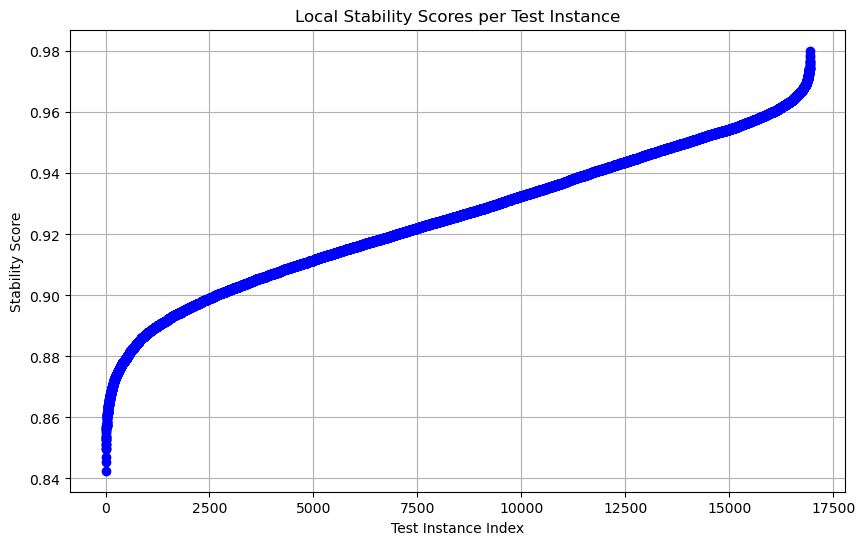

In [17]:
import matplotlib.pyplot as plt

# Assuming `final_stability_score` is your array of stability scores from the modified function
stability_scores = np.array(test.stab_shap)[0]
stability_scores = np.sort(stability_scores)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stability_scores, marker='o', linestyle='-', color='blue')
plt.title('Local Stability Scores per Test Instance')
plt.xlabel('Test Instance Index')
plt.ylabel('Stability Score')
plt.grid(True)
plt.show()